In [12]:
from sklearn.datasets import fetch_openml

#Fetch MNIST

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')
X = mnist.data
y = mnist.target

In [13]:
import numpy as np

# Keep only 0s and 1s
mask = (y == '0') | (y == '1')
X_binary = X[mask]
y_binary = y[mask].astype(int)  # Convert to integers

In [14]:
# Take first 500 samples
X_small = X_binary[:500]
y_small = y_binary[:500]

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)  # 784 -> 4 features
X_reduced = pca.fit_transform(X_small)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_small, test_size=0.2, random_state=42
)

## Data Validation

In [17]:
print(f"X_train shape: {X_train.shape}")  # Should be (400, 8) for 500 samples
print(f"X_test shape: {X_test.shape}")    # Should be (100, 8)
print(f"y_train shape: {y_train.shape}")  # Should be (400,)
print(f"y_test shape: {y_test.shape}")    # Should be (100,)

X_train shape: (400, 4)
X_test shape: (100, 4)
y_train shape: (400,)
y_test shape: (100,)


In [18]:
print(f"Training labels: {np.unique(y_train, return_counts=True)}")
print(f"Test labels: {np.unique(y_test, return_counts=True)}")
# Should show roughly equal 0s and 1s

Training labels: (array([0, 1]), array([175, 225]))
Test labels: (array([0, 1]), array([54, 46]))


In [19]:
print(f"Data type: {X_train.dtype}")
print(f"Min value: {X_train.min()}")
print(f"Max value: {X_train.max()}")
print(f"Mean: {X_train.mean()}")

Data type: float64
Min value: -1997.366014306855
Max value: 1355.8895808440152
Mean: 17.94702286602647


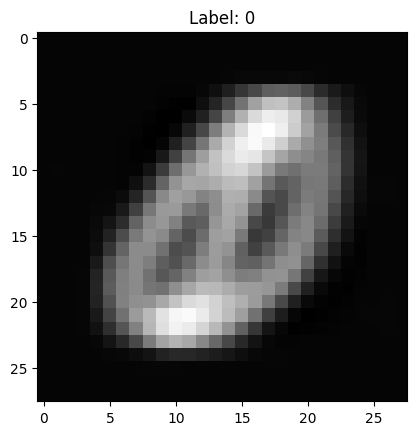

In [20]:
import matplotlib.pyplot as plt

# Reconstruct original image from PCA
sample_reconstructed = pca.inverse_transform(X_train[0].reshape(1, -1))
plt.imshow(sample_reconstructed.reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [21]:
# Make sure no NaN values
print(f"Any NaN values? {np.isnan(X_train).any()}")

# Check if labels are correct type
print(f"Label types: {type(y_train[0])}, values: {y_train[:10]}")

Any NaN values? False
Label types: <class 'numpy.int64'>, values: [0 0 1 1 0 1 0 1 1 0]


In [22]:
# Save the arrays
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)